<a href="https://colab.research.google.com/github/DiegoLLP123/upsrj-machine-learning/blob/main/CancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Carga de base de datos
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# Variables para nuestro modelo
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [6]:
# división de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
# Creación y entrenamiento del modelo
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [9]:
# Predicción
y_pred = model.predict(X_test)

In [11]:
#Evaluacion del modelo
print(f"accuracy_score:\n{accuracy_score(y_test, y_pred)}")
print(f"confusion matrix:\n {confusion_matrix(y_test, y_pred)}")
print(f"classification report:\n {classification_report(y_test, y_pred)}")

accuracy_score:
0.9385964912280702
confusion matrix:
 [[39  3]
 [ 4 68]]
classification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



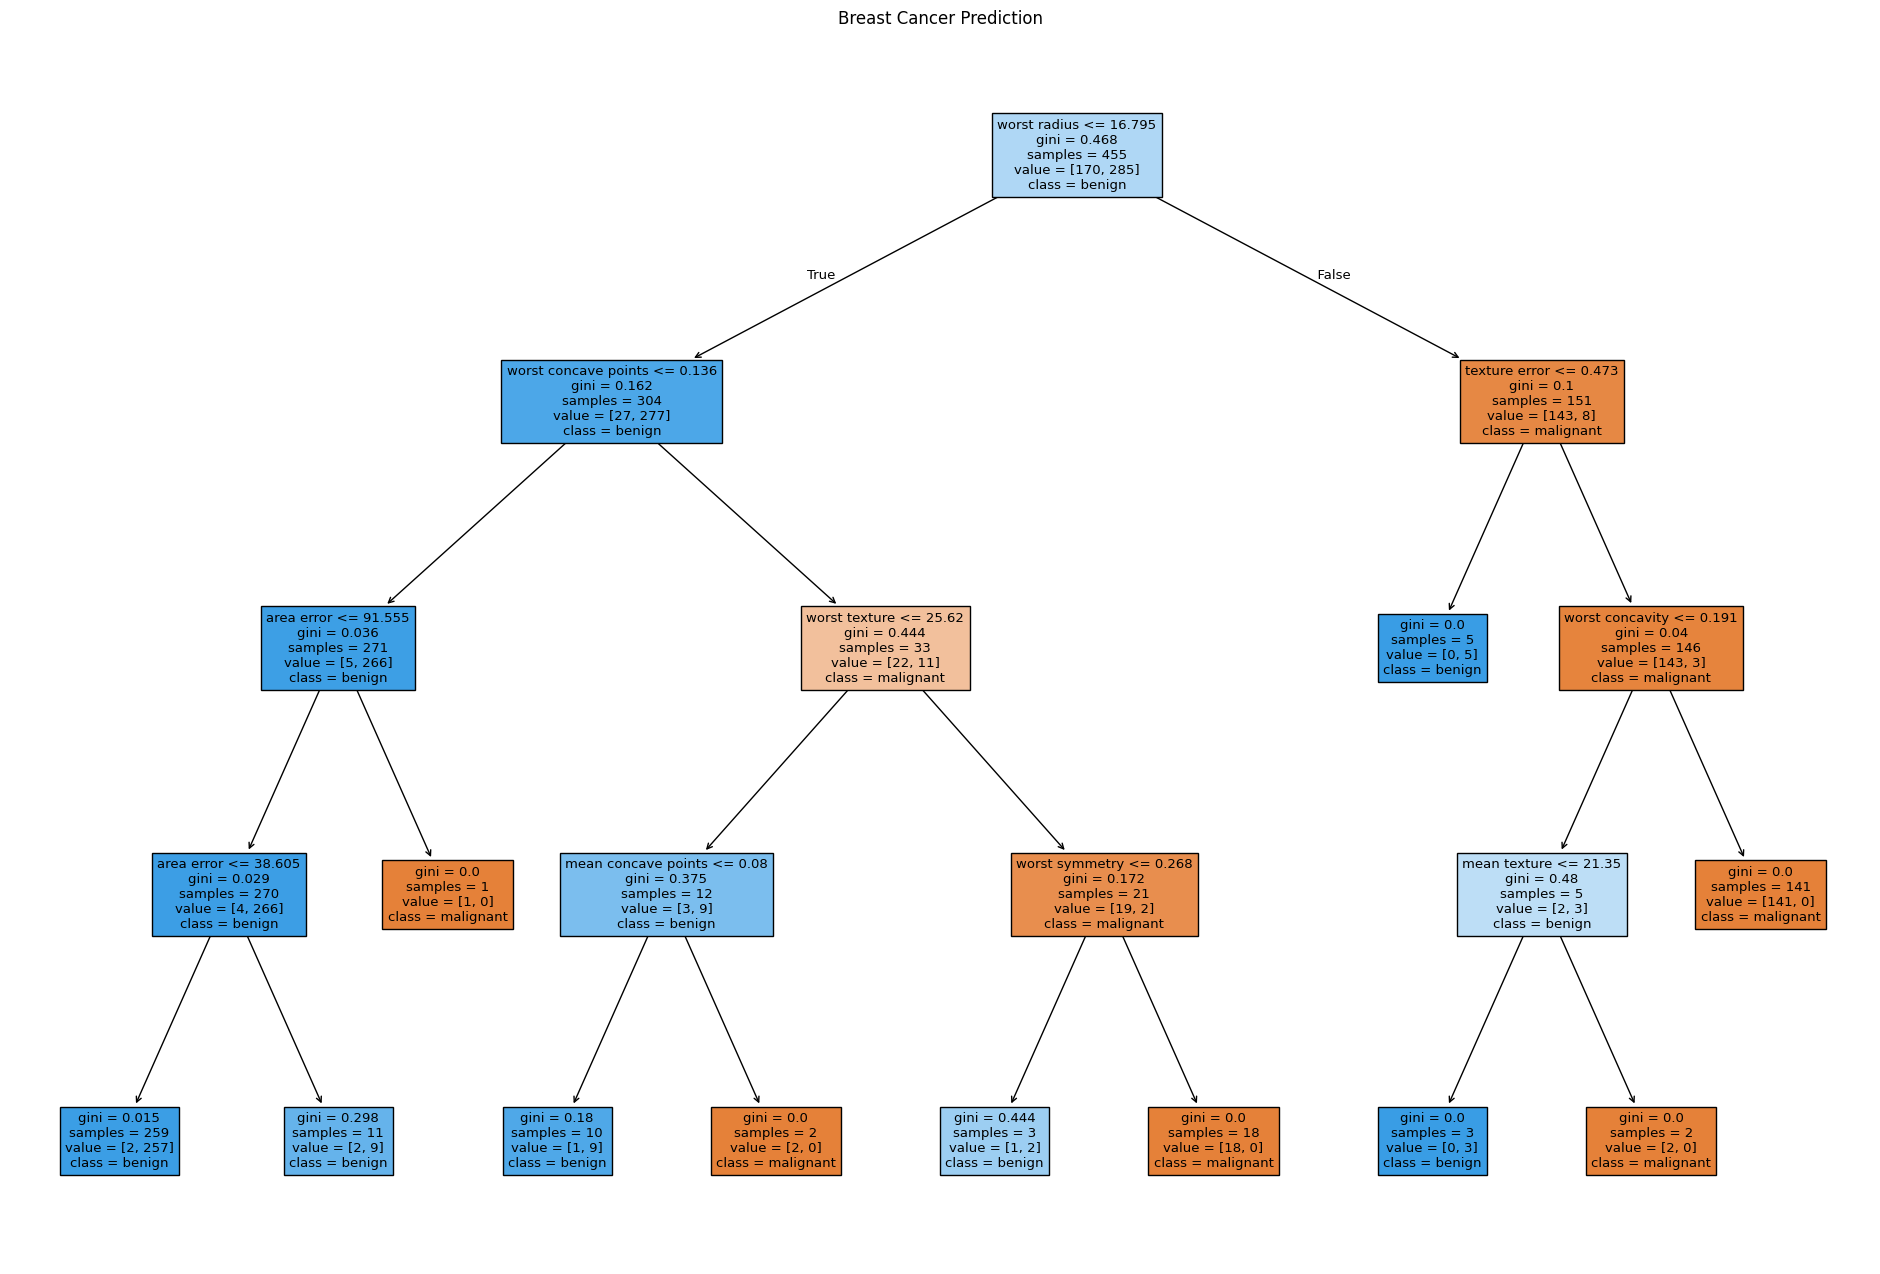

In [23]:
plt.figure(figsize=(24,16))
plot_tree(
    model,
    feature_names = feature_names,
    class_names = target_names,
    filled =True
)
plt.title("Breast Cancer Prediction")
plt.show()